In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-23-11 13:12:13
MODIFIED: 2022-22-12 11:18:45
"""

# -*- coding:utf-8 -*-
import cv2 as cv
import os
import sys
from src.model import preprocess
from src.postprocess import post_process, get_sizes
from PIL import Image


sys.path.append('../../Common/acllite')

from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
import constants as const


In [2]:
INPUT_DIR = './data/'
OUTPUT_DIR = './out/'

In [3]:
device_id = 0
model_path = './model/yolov4_bs1.om'

In [4]:
acl_resource = AclLiteResource(device_id)
acl_resource.init()
print('[Device] NPU Device id:',acl_resource.device_id)
model = AclLiteModel(model_path)

init resource stage:
Init resource success
[Device] NPU Device id: 0
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 368220
malloc output 1, size 1472880
malloc output 2, size 5891520
Create model output dataset success
Init model resource success


In [5]:
images_list = [os.path.join(INPUT_DIR, img)
                   for img in os.listdir(INPUT_DIR)
                   if os.path.splitext(img)[1] in const.IMG_EXT]
pic = images_list[0]

In [6]:
#read image
bgr_img = cv.imread(pic)
#preprocess
data, orig = preprocess(pic,model._model_desc)
#Send into model inference
result_list = model.execute([data,])    
#Process inference results
result_return = post_process(result_list, orig, model._model_desc)

model input size 1
input  0
model input dims ({'name': 'x', 'dimCount': 4, 'dims': [1, 3, 608, 608]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'output_0_trans_Cast_353_0', 'dimCount': 5, 'dims': [1, 19, 19, 3, 85]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'output_1_trans_Cast_354_0', 'dimCount': 5, 'dims': [1, 38, 38, 3, 85]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'output_2_trans_Cast_355_0', 'dimCount': 5, 'dims': [1, 76, 76, 3, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success
new_image.shape (608, 608, 3)
post process
pred.shape (1, 19, 19, 3, 85)
conv_output.shape (1, 19, 19, 3, 85)
19 19
conv out-shape (1, 19, 19, 3, 85)
pred-reshaped (1083, 85)
pred[:, 5] []
pred[:, 5] shape (0,)
pred.shape (1, 38, 38, 3, 85)
conv_output.shape (1, 38, 38, 3, 85)
38 38
conv out-shape (1, 38, 38, 3, 85)
pred-reshaped (4332, 85)
pred[:, 5] [33. 33.  0.  0.  0.  0.]
pred[:, 5]

In [7]:
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (255, 0, 255), (255, 255, 0)]
for i in range(len(result_return['detection_classes'])):
    box = result_return['detection_boxes'][i]
    class_name = result_return['detection_classes'][i]
    confidence = result_return['detection_scores'][i]
    cv.rectangle(bgr_img, (int(box[1]), int(box[0])), (int(box[3]), int(box[2])), colors[i % 6])
    p3 = (max(int(box[1]), 15), max(int(box[0]), 15))
    out_label = class_name            
    cv.putText(bgr_img, out_label, p3, cv.FONT_ITALIC, 0.6, colors[i % 6], 2)

output_file = os.path.join(OUTPUT_DIR, "out_" + os.path.basename(pic))
print("output:%s" % output_file)
cv.imwrite(output_file, bgr_img)
print("Execute end")

output:./out/out_test.jpg
Execute end


['./out/out_test.jpg']


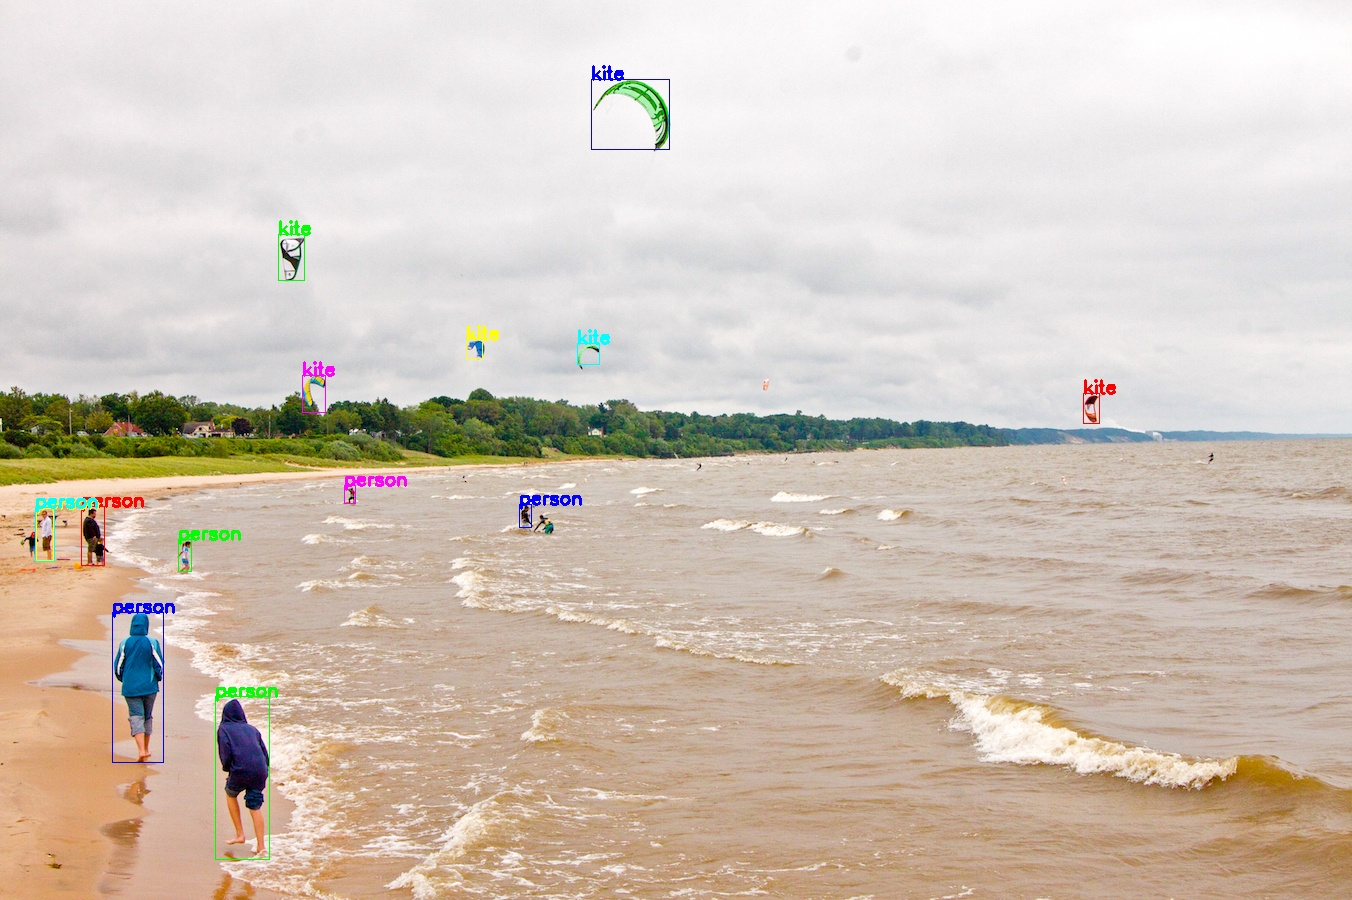

In [8]:
images_list = [os.path.join(OUTPUT_DIR, img)
                   for img in os.listdir(OUTPUT_DIR)
                   if os.path.splitext(img)[1] in const.IMG_EXT]
print(images_list)
output_img = cv.imread(images_list[0])
res_img = cv.cvtColor(output_img, cv.COLOR_BGR2RGB)
res_img_plw = Image.fromarray(res_img)
res_img_plw